## The Sparks Foundation : Graduate Rotational Internship Program (GRIP) - Data Science & Business Analytics

### Author : Noman Ali

### Task 2 : Prediction using Unsupervised Machine Learning

    Probem Statement - 
    ◙ Predict the optimum number of clusters and represent it visually. 

    Solution -
    We will be using K-Means clustering and Hierarchical clustering in terms to find the optimum number of clusters for the Iris dataset.   
     

    Steps followed -
    ◙ Step 1 - Importing the required libraries  
    ◙ Step 2 - Importing the data set
    ◙ Step 3 - Studying the data  
    ◙ Step 4 - Finding the optimum number of clusters by K-Means clustering 
    ◙ Step 5 - Fitting the K-Means clustering on the dataset
    ◙ Step 6 - Visualizing the clusters 
    ◙ Step 7 - Finding the optimum no. of clusters by other method - Hierarchical clustering 
    ◙ Step 8 - Visualizing the clusters created by Hierarchical clustering  

####  Step 1 - Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

#### Step 2 - Importing the data set

In [24]:
iris = pd.read_csv('Iris.csv')

In [25]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Step 3 - Studying the data

In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
iris_df = iris.iloc[:,1:5]
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Step 4 - Finding the optimum number of clusters by K-Means clustering 
Before clustering the data using K-Means, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available out of which we will be using the Elbow method here. 

In [29]:
# Calculating the within-cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)

#### Elbow Method :
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

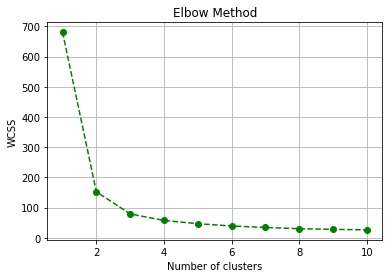

In [30]:
# Plotting the "within-cluster sum of square" against clusters range
plt.plot(range(1, 11), wcss, 'go--', color='green')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

As we can see in the graph above, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Looking at it we understand that the optimum number of clusters are '3' here.

#### Step 5 - Fitting the K-Means clustering on the dataset

In [31]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

#### Step 6 - Visualizing the clusters

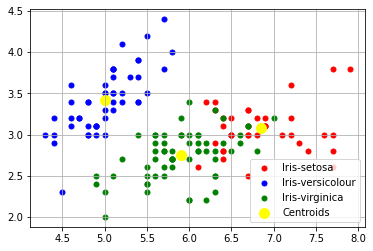

In [32]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

#### Step 7 - Finding the optimum no. of clusters by other method - Hierarchical clustering
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, & the objects within each cluster are broadly similar to each other.
Finally we summarize this process in a Dendogram. 
    
#### A brief about Dendogram:
A dendrogram is a type of tree diagram showing hierarchical clustering — relationships between similar sets of data. 

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sn

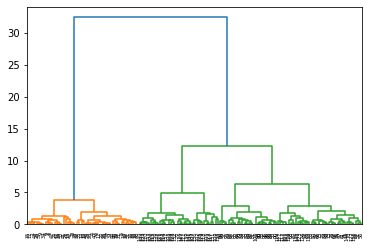

In [34]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(iris_df, method='ward'))

#### Step 8 - Visualizing the clusters created by Hierarchical clustering 

If we cut the dendogram horizontally at y axis = 8 we can clearly see that 03 clusters are getting formed even by the Hierarchical clustering method. 

Here we can visualize the same. 

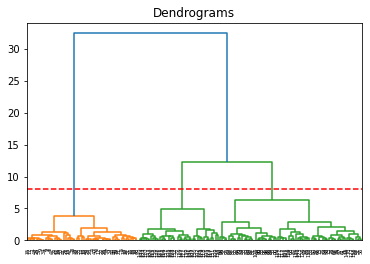

In [35]:
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(iris_df, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')
plt.show()